# Explore the data

This notebook is dedicated toward understanding the data, formulation of two prediction problem to represent customer understanding, and feature engineering from raw data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = './data/instacart-market-basket-analysis/'
aisles = pd.read_csv(data_path + 'aisles.csv')
departments = pd.read_csv(data_path + 'departments.csv')
order_products_prior = pd.read_csv(data_path + 'order_products__prior.csv')
order_products_train = pd.read_csv(data_path + 'order_products__train.csv')
orders = pd.read_csv(data_path + 'orders.csv')
products = pd.read_csv(data_path + 'products.csv')


## Understand the structure of the data

In [3]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [4]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [5]:
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [6]:
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [11]:
orders[orders["user_id"] == 206208]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421019,2227043,206208,prior,1,1,15,NaN
3421020,1959749,206208,prior,2,2,14,8.0
3421021,3392839,206208,prior,3,2,15,7.0
3421022,731227,206208,prior,4,3,15,8.0
3421023,2936891,206208,prior,5,1,10,5.0
3421024,2072319,206208,prior,6,1,18,7.0
3421025,2061009,206208,prior,7,0,20,20.0
3421026,1923981,206208,prior,8,1,10,8.0
3421027,126826,206208,prior,9,5,10,11.0
3421028,2995770,206208,prior,10,3,14,5.0


In [12]:
orders[orders["user_id"] == 111440]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1856451,2265286,111440,prior,1,4,10,NaN
1856452,1307373,111440,prior,2,4,14,7.0
1856453,1808064,111440,prior,3,4,10,7.0
1856454,1571988,111440,train,4,0,14,3.0


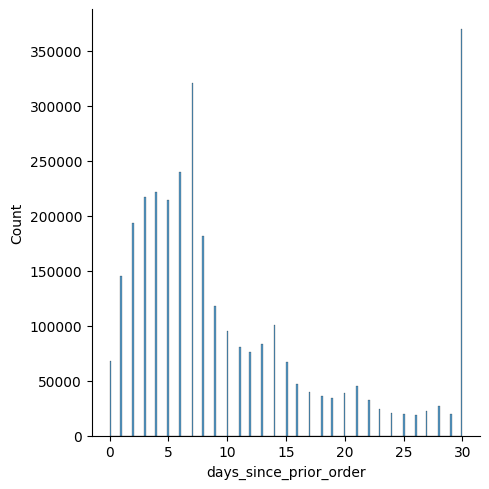

In [13]:
sns.displot(orders.days_since_prior_order)

=> It seems like `days_since_prior_order` is capped at 30

In [14]:
orders[orders["eval_set"].isin(["test"])].days_since_prior_order.describe(percentiles=[0.1, 0.2, 0.25, 0.33, 0.5, 0.66, 0.75, 0.9])

count    75000.000000
mean        17.082640
std         10.664071
min          0.000000
10%          4.000000
20%          6.000000
25%          7.000000
33%          9.000000
50%         15.000000
66%         27.000000
75%         30.000000
90%         30.000000
max         30.000000
Name: days_since_prior_order, dtype: float64

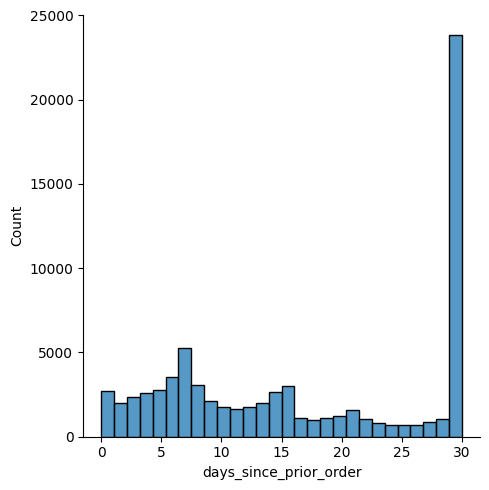

In [15]:
sns.displot(orders[orders["eval_set"].isin(["test"])].days_since_prior_order)

In [16]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## Problem formulation

Let's say we focus on predicting future behavior of the customers, including the two following problems:
- How long will it be until the customer return (`<1week`, `1-2weeks`, `2-4weeks`, `>=30days`)
- In the customer's next order, will the majority of the order  contains re-purchase products. (`<50%`, `>=50%`)

**Prepare dataset**

To also leverage customers from the test dataset, we use their last order ("before the `test` order") to create label. To do this, we change the `eval_set` status of those order to `train`.

The models and algorithms built will be evaluated using k-fold validation method.

In [17]:
test_users = orders.loc[orders["eval_set"] == "test", ["user_id", "order_number"]].set_index("user_id")
test_users.rename(columns={"order_number": "test_order_number"}, inplace=True)
orders = orders.merge(test_users, how="left", left_on="user_id", right_index=True)
orders["test_order_number"].fillna(-1, inplace=True)
orders.loc[orders["order_number"] == orders["test_order_number"] - 1, "eval_set"] = "train"
orders.drop("test_order_number", axis=1, inplace=True)
orders = orders[orders["eval_set"] != "test"].reset_index(drop=True)
orders["eval_set"].value_counts()

prior    3139874
train     206209
Name: eval_set, dtype: int64

In [18]:
# At the sametime, we also need to move the last order (newly labeled as "train" instead of "prior") 
# of test users from order_products_prior to order_products_train

test_users_last_order_id = orders.merge(test_users, how="inner", on="user_id")
test_users_last_order_id = test_users_last_order_id[test_users_last_order_id["eval_set"] == "train"]["order_id"]
order_products_test = order_products_prior[order_products_prior["order_id"].isin(test_users_last_order_id)]
order_products_train = pd.concat([order_products_train, order_products_test], axis=0)
order_products_prior = order_products_prior[~order_products_prior["order_id"].isin(test_users_last_order_id)]

In [19]:
# Check if the number of orders in order_products_prior and order_products_train is correct
assert len(order_products_prior.order_id.unique()) == len(orders[orders["eval_set"] == "prior"])
assert len(order_products_train.order_id.unique()) == len(orders[orders["eval_set"] == "train"])


In [20]:
# Using order_products_train and orders[orders['eval_set']=="train"] 
# to create labels for each user: days_to_next_order, reorder_ratio

labels_df = orders[orders["eval_set"] == "train"][["user_id", "order_id", "days_since_prior_order"]].copy()
labels_df.rename(columns={
    "days_since_prior_order": "days_to_next_order",
    "order_id":"next_order_id"}, 
    inplace=True)
reorder_ratio = order_products_train.groupby("order_id")["reordered"].mean()
labels_df = labels_df.merge(reorder_ratio, how="left", left_on="next_order_id", right_index=True)
labels_df.rename(columns={"reordered": "reorder_ratio"}, inplace=True)
print(labels_df.shape)
labels_df.head()

(206209, 4)


,user_id,next_order_id,days_to_next_order,reorder_ratio
10,1,1187899,14.0,0.909091
25,2,1492625,30.0,0.387097
37,3,1402502,15.0,1.000000
42,4,2557754,0.0,0.000000
47,5,2196797,6.0,0.444444


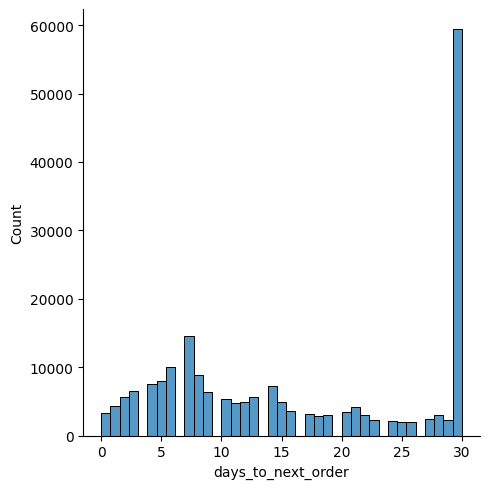

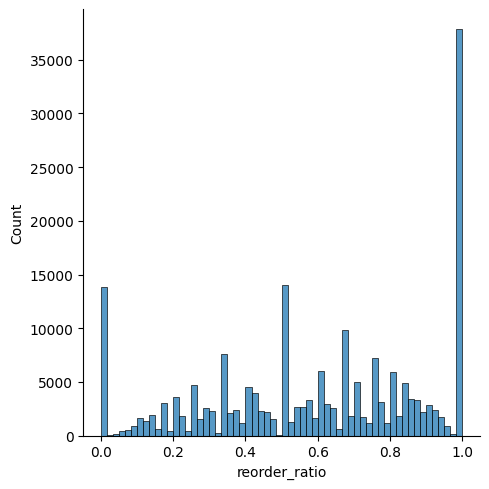

In [21]:
# See the distribution of labels
sns.displot(labels_df.days_to_next_order)
sns.displot(labels_df.reorder_ratio)
plt.show()

In [22]:
# To simplify the problem, we reduce to a classification problem. For days_to_next_order:
# 1. If days_to_next_order < 7, label it as 0 (reorder within a week)
# 2. If days_to_next_order >= 7 and < 15, label it as 1 (reorder in 1-2 weeks)
# 3. If days_to_next_order >= 15 and < 30, label it as 2 (reorder in 2-4 weeks)
# 4. If days_to_next_order >= 30, label it as 3 (reorder in 1 month or later)
labels_df["cls_days_to_next_order"] = labels_df["days_to_next_order"].apply(lambda x: 0 if x < 7 else (1 if x < 15 else (2 if x < 30 else 3)))

# Similarly, for reorder_ratio:
# 1. If reorder_ratio < 0.1, label it as 0 (reorder product ratio < 10%)
# 2. If reorder_ratio >= 0.1 and < 0.5, label it as 1 (reorder product ratio 10%-50%)
# 3. If reorder_ratio >= 0.5 and < 0.9, label it as 2 (reorder product ratio 50%-90%)
# 4. If reorder_ratio >= 0.9, label it as 3 (reorder product ratio >= 90%)
labels_df["cls_reorder_ratio"] = labels_df["reorder_ratio"].apply(lambda x: 0 if x < 0.1 else (1 if x < 0.5 else (2 if x < 0.9 else 3)))

In [23]:
labels_df.cls_days_to_next_order.value_counts(normalize=True).sort_index()

0    0.219884
1    0.279707
2    0.212430
3    0.287980
Name: cls_days_to_next_order, dtype: float64

In [24]:
labels_df.cls_reorder_ratio.value_counts(normalize=True).sort_index()

0    0.076699
1    0.262113
2    0.438283
3    0.222905
Name: cls_reorder_ratio, dtype: float64

In [25]:
labels_df.reset_index(drop=True, inplace=True)
labels_df.head()

,user_id,next_order_id,days_to_next_order,reorder_ratio,cls_days_to_next_order,cls_reorder_ratio
0,1,1187899,14.0,0.909091,1,3
1,2,1492625,30.0,0.387097,3,1
2,3,1402502,15.0,1.000000,2,3
3,4,2557754,0.0,0.000000,0,0
4,5,2196797,6.0,0.444444,0,1


In [26]:
labels_df.to_csv("./data/labels.csv", index=False)

# Analysis on customer behavior

Regarding frequency, the following factors might affect cls_days_to_next_order:
- Scheduling habits: Reflect in historical frequency (weekly or fortnightly; stable or spontaneous; etc.)
- Types of product bought: (e.g. fresh foods need to be restock quicker, while frozen foods can be bought in bulk)
- Loyalty and wallet share: If the customers get supplies mostly from instacart or elsewhere

Regarding reordering behavior, the following factors might affect cls_reorder_ratio:
- Number of products bought: The more products bought in the past, the more likely new ones will be a reorder
- Types of products bought: Some products are meant to be restock regularly, while others are one-time purchases
- Purposes of instarcart shopping

Let's explore the datasets to see if there are bases for those assumptions.


In [23]:
product_reorder_rate = order_products_prior.groupby("product_id")["reordered"].agg(['mean', 'std', 'count'])
product_reorder_rate = product_reorder_rate.rename(
    columns={"mean": "product_reorder_rate", "count": "order_count", "std": "product_reorder_std"}
    ).sort_values('product_reorder_rate',ascending=False).reset_index()
# product_reorder_rate.head()
product_reorder_rate = product_reorder_rate.merge(products, how="left", on="product_id")
product_reorder_rate = pd.merge(product_reorder_rate, aisles, how="left", on="aisle_id")
product_reorder_rate = pd.merge(product_reorder_rate, departments, how="left", on="department_id")
print(product_reorder_rate.shape)
product_reorder_rate.head(10)

(49668, 9)


,product_id,product_reorder_rate,product_reorder_std,order_count,product_name,aisle_id,department_id,aisle,department
0,6433,0.941176,0.237044,68,Raw Veggie Wrappers,13,20,prepared meals,deli
1,13875,0.931818,0.254972,44,Simply Sleep Nighttime Sleep Aid,6,2,other,other
2,2075,0.930233,0.256249,86,Serenity Ultimate Extrema Overnight Pads,126,11,feminine care,personal care
3,700,0.925926,0.266880,27,Jet Fuel Dark Roast Whole Bean Coffee,26,7,coffee,beverages
4,43553,0.923077,0.277350,13,Orange Energy Shots,64,7,energy sports drinks,beverages
5,27740,0.920792,0.271410,101,Chocolate Love Bar,45,19,candy chocolate,snacks
6,4212,0.916667,0.280306,36,High Gravity Lager,27,5,beers coolers,alcohol
7,14609,0.914286,0.284029,35,Soy Powder Infant Formula,92,18,baby food formula,babies
8,39992,0.909091,0.294245,22,"Energy Shot, Grape Flavor",64,7,energy sports drinks,beverages
9,31418,0.900000,0.302532,60,Sparking Water,115,7,water seltzer sparkling water,beverages


In [24]:
product_reorder_rate[product_reorder_rate["order_count"] > 1000].head(10)

,product_id,product_reorder_rate,product_reorder_std,order_count,product_name,aisle_id,department_id,aisle,department
33,9292,0.860522,0.346505,2875,Half And Half Ultra Pasteurized,84,16,milk,dairy eggs
37,45504,0.859631,0.347388,8955,Whole Organic Omega 3 Milk,84,16,milk,dairy eggs
39,43394,0.858395,0.348665,8326,Organic Lactose Free Whole Milk,91,16,soy lactosefree,dairy eggs
40,5514,0.857946,0.349150,3914,Organic Homogenized Whole Milk,84,16,milk,dairy eggs
41,47231,0.857240,0.349947,1471,Ultra-Purified Water,115,7,water seltzer sparkling water,beverages
55,29447,0.854092,0.353023,19855,"Milk, Organic, Vitamin D",84,16,milk,dairy eggs
59,38689,0.850618,0.356469,35011,Organic Reduced Fat Milk,84,16,milk,dairy eggs
60,34197,0.849597,0.357501,5093,Goat Milk,84,16,milk,dairy eggs
76,24852,0.842727,0.364058,461821,Banana,24,4,fresh fruits,produce
80,31720,0.841301,0.365414,9685,Organic Whole Milk,84,16,milk,dairy eggs


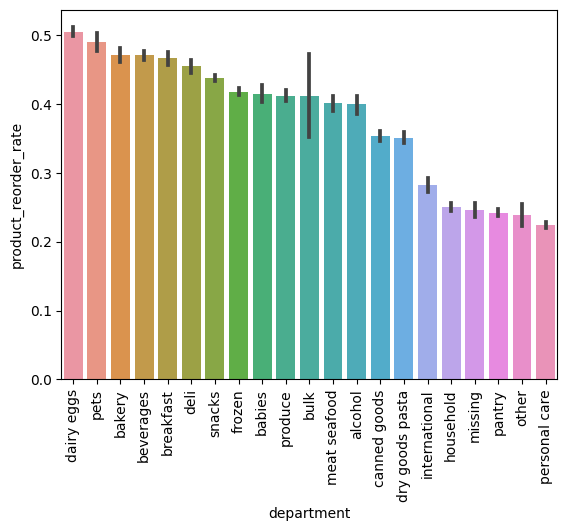

In [25]:
# using sns to plot the reorder rate of each department, sorted by the mean reorder rate
sns.barplot(x="department", y="product_reorder_rate", data=product_reorder_rate, 
    order=product_reorder_rate.groupby("department")["product_reorder_rate"].mean().sort_values(ascending=False).index
    )
plt.xticks(rotation=90)
plt.show()

`Dairy and Eggs` and `Bakery`, expectedly, are a mong the most departments with reorder products. Although, It is interesting to me that `Pets` are the second-most reordered departments, while `personal care` are the least.

It is clear that there are differences in product types regarding reorder rate, thus, designing features to exploit this phenomenon might be beneficial.

In [26]:
product_days_since = order_products_prior.merge(orders, how="left", on="order_id")\
        .groupby("product_id")["days_since_prior_order"].agg(['mean', 'std', 'count'])
product_days_since = product_days_since.rename(
        columns={"mean": "product_days_since_mean", "count": "order_count", "std": "product_days_since_std"}
).sort_values('product_days_since_mean',ascending=False).reset_index()
product_days_since = product_days_since.merge(products, how="left", on="product_id")
product_days_since = pd.merge(product_days_since, aisles, how="left", on="aisle_id")
product_days_since = pd.merge(product_days_since, departments, how="left", on="department_id")
product_days_since.head()

,product_id,product_days_since_mean,product_days_since_std,order_count,product_name,aisle_id,department_id,aisle,department
0,10657,30.0,NaN,1,Totally Fudge Premium Pops,37,1,ice cream ice,frozen
1,6786,30.0,NaN,1,Anjou Pear Hand Soap,127,11,body lotions soap,personal care
2,10584,30.0,NaN,1,Homestlye Cornbread Stuffing,4,9,instant foods,dry goods pasta
3,12051,30.0,NaN,1,Aged Basmati Rice,63,9,grains rice dried goods,dry goods pasta
4,8679,30.0,0.0,2,Asiago Beef With Penne,34,1,frozen meat seafood,frozen


In [27]:
product_days_since[product_days_since["order_count"] > 1000].head(10)

,product_id,product_days_since_mean,product_days_since_std,order_count,product_name,aisle_id,department_id,aisle,department
1053,38300,18.076217,10.425000,1417,Tall Kitchen Bag With Febreze Odor Shield,60,17,trash bags liners,household
1243,14419,17.688923,10.206169,1318,Fresh Scent Laundry Detergent,75,17,laundry,household
1280,23662,17.616348,10.045406,1358,All Natural White Vinegar,19,13,oils vinegars,pantry
1525,1957,17.198366,10.417031,1346,Fabric Softener Dryer Sheet Outdoor Fresh 160C...,75,17,laundry,household
1739,9358,16.911593,10.340143,1889,April Fresh Liquid Fabric Softener,75,17,laundry,household
1959,26405,16.612717,10.610775,1038,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household
2078,32079,16.499763,10.026384,2107,Shredded Parmigiano Reggiano,21,16,packaged cheese,dairy eggs
2085,280,16.468599,10.158499,1035,Makeup Remover Cleansing Towelettes,73,11,facial care,personal care
2171,907,16.338737,10.153870,1789,Premium Sliced Bacon,106,12,hot dogs bacon sausage,meat seafood
2399,13259,16.089711,9.983705,2731,Organic Variety Pack,98,7,juice nectars,beverages


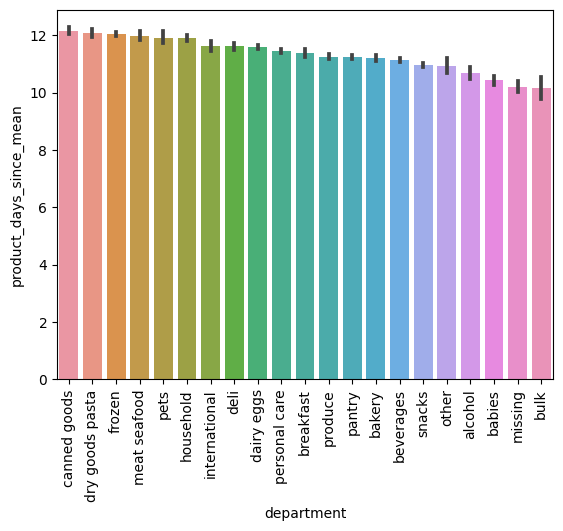

In [28]:
# using sns to plot product_days_since_mean of each department, sorted by the mean reorder rate
sns.barplot(x="department", y="product_days_since_mean", data=product_days_since,
    order=product_days_since.groupby("department")["product_days_since_mean"].mean().sort_values(ascending=False).index
    )
plt.xticks(rotation=90)
plt.show()

Shelf-stable products (canned goods, dry pasta, frozen foods, etc.), expectedly, seems to have the highest average days_since_prior_order. Meanwhile, snacks, alcohol, babies products, and bulk products have the lowest.

However, the patterns are not as clear in this cases. This is understandable because one order can contains products from multiple departments and days_since_prior_order is only provided at order level.

In [29]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [30]:
# Calculate historical days since last order for each user
user_days_since = orders[orders["eval_set"] == "prior"].groupby("user_id")["days_since_prior_order"].agg(['mean', 'std'])
user_days_since = user_days_since.rename(
        columns={"mean": "user_days_since_mean", "std": "user_days_since_std"}
).reset_index()
user_days_since.head()

,user_id,user_days_since_mean,user_days_since_std
0,1,19.555556,9.395625
1,2,15.230769,9.867065
2,3,11.800000,5.573748
3,4,18.333333,3.055050
4,5,13.333333,4.932883


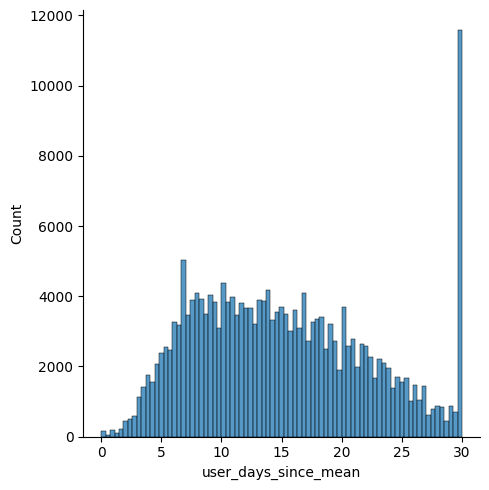

In [31]:
# sns plot user_days_since_mean of each user
sns.displot(user_days_since["user_days_since_mean"])
plt.show()

# Feature engineering

As we are trying to predict frequency (days to next order), and reorder behavior. The following information might have good predictive power:
- Time between purchases for previous orders
- Number of previous orders
- Average number of products per order
- Number of unique products bought
- Average number of unique ailes per order
- Number of unique ailes bought
- Average percentage of reorder products per order


In [32]:
product_reorder_rate.head()

,product_id,product_reorder_rate,product_reorder_std,order_count,product_name,aisle_id,department_id,aisle,department
0,6433,0.941176,0.237044,68,Raw Veggie Wrappers,13,20,prepared meals,deli
1,13875,0.931818,0.254972,44,Simply Sleep Nighttime Sleep Aid,6,2,other,other
2,2075,0.930233,0.256249,86,Serenity Ultimate Extrema Overnight Pads,126,11,feminine care,personal care
3,700,0.925926,0.266880,27,Jet Fuel Dark Roast Whole Bean Coffee,26,7,coffee,beverages
4,43553,0.923077,0.277350,13,Orange Energy Shots,64,7,energy sports drinks,beverages


In [33]:
labels_df.head()

,user_id,next_order_id,days_to_next_order,reorder_ratio,cls_days_to_next_order,cls_reorder_ratio
0,1,1187899,14.0,0.909091,1,3
1,2,1492625,30.0,0.387097,3,1
2,3,1402502,15.0,1.000000,2,3
3,4,2557754,0.0,0.000000,0,0
4,5,2196797,6.0,0.444444,0,1


In [34]:
features_df = labels_df[["user_id"]].copy()
# Add user_days_since features
features_df = pd.merge(features_df, user_days_since, how="left", on="user_id")
features_df.head()

,user_id,user_days_since_mean,user_days_since_std
0,1,19.555556,9.395625
1,2,15.230769,9.867065
2,3,11.800000,5.573748
3,4,18.333333,3.055050
4,5,13.333333,4.932883


In [35]:
# Add order-level features
order_features = orders[orders["eval_set"] == "prior"].merge(order_products_prior, how="left", on="order_id")
order_features = order_features.groupby(["user_id","order_id"]).agg({
    "product_id": "count",
    "reordered": "mean",
})
order_features.rename(columns={"product_id": "ord_product_count", "reordered": "ord_reorder_rate"}, inplace=True)
order_features.reset_index(inplace=True)
order_features = order_features.groupby("user_id").agg({
    "ord_product_count": ["mean", "std"], "ord_reorder_rate": ["mean", "std"]}
    )
order_features.columns = ["_".join(x) for x in order_features.columns.ravel()]
order_features.reset_index(inplace=True)
order_features.head()


/var/folders/yh/0ppzrrgs7m77v8rxlkjbf2540000gn/T/ipykernel_76952/2948144647.py:12: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  order_features.columns = ["_".join(x) for x in order_features.columns.ravel()]


,user_id,ord_product_count_mean,ord_product_count_std,ord_reorder_rate_mean,ord_reorder_rate_std
0,1,5.900000,1.523884,0.705833,0.317544
1,2,13.928571,5.717238,0.447961,0.315789
2,3,7.454545,2.161649,0.627801,0.331377
3,4,3.750000,2.362908,0.035714,0.071429
4,5,9.250000,3.095696,0.377778,0.277555


In [36]:
# Add product_reorder_rate features
product_features = orders[orders["eval_set"] == "prior"].merge(order_products_prior, how="left", on="order_id")\
    .merge(product_reorder_rate[["product_id", "product_reorder_rate", "product_reorder_std"]], how="left", on="product_id")\
    .groupby("user_id").agg({
        "product_reorder_rate": "mean",
        "product_reorder_std": "mean",
        "reordered": "mean",
        "product_id": "nunique",
        "order_id": "nunique",
        "order_dow": "nunique",
    })
product_features.rename(columns={
    "product_reorder_rate": "prod_reorder_rate_mean",
    "product_reorder_std": "prod_reorder_std_mean",
    "reordered": "user_reorder_rate",
    "product_id": "prod_nunique",
    "order_id": "order_cnt",
    "order_dow": "order_dow_nunique",
}, inplace=True)
product_features.reset_index(inplace=True)
product_features.head()



,user_id,prod_reorder_rate_mean,prod_reorder_std_mean,user_reorder_rate,prod_nunique,order_cnt,order_dow_nunique
0,1,0.725334,0.437883,0.694915,18,10,4
1,2,0.634116,0.463857,0.476923,102,14,5
2,3,0.617979,0.472159,0.597561,33,11,4
3,4,0.550503,0.469545,0.066667,14,4,3
4,5,0.581885,0.474626,0.378378,23,4,3


In [37]:
product_features_days_since = orders[orders["eval_set"] == "prior"].merge(order_products_prior, how="left", on="order_id")\
    .merge(product_days_since[["product_id", "product_days_since_mean", "product_days_since_std"]], how="left", on="product_id")\
    .groupby("user_id").agg({
        "product_days_since_mean": "mean",
        "product_days_since_std": "mean",
    })
product_features_days_since.rename(columns={
    "product_days_since_mean": "prod_days_since_mean_mean",
    "product_days_since_std": "prod_days_since_std_mean",
}, inplace=True)
product_features_days_since.reset_index(inplace=True)
product_features_days_since.head()

,user_id,prod_days_since_mean_mean,prod_days_since_std_mean
0,1,11.119767,8.668178
1,2,10.761481,8.449797
2,3,11.235237,8.722556
3,4,11.515205,8.788381
4,5,10.676956,8.507307


In [38]:
features_df = pd.merge(features_df, order_features, how="left", on="user_id")
features_df = pd.merge(features_df, product_features, how="left", on="user_id")
features_df = pd.merge(features_df, product_features_days_since, how="left", on="user_id")
print(features_df.shape)
features_df.head()

(206209, 15)


,user_id,user_days_since_mean,user_days_since_std,ord_product_count_mean,ord_product_count_std,ord_reorder_rate_mean,ord_reorder_rate_std,prod_reorder_rate_mean,prod_reorder_std_mean,user_reorder_rate,prod_nunique,order_cnt,order_dow_nunique,prod_days_since_mean_mean,prod_days_since_std_mean
0,1,19.555556,9.395625,5.900000,1.523884,0.705833,0.317544,0.725334,0.437883,0.694915,18,10,4,11.119767,8.668178
1,2,15.230769,9.867065,13.928571,5.717238,0.447961,0.315789,0.634116,0.463857,0.476923,102,14,5,10.761481,8.449797
2,3,11.800000,5.573748,7.454545,2.161649,0.627801,0.331377,0.617979,0.472159,0.597561,33,11,4,11.235237,8.722556
3,4,18.333333,3.055050,3.750000,2.362908,0.035714,0.071429,0.550503,0.469545,0.066667,14,4,3,11.515205,8.788381
4,5,13.333333,4.932883,9.250000,3.095696,0.377778,0.277555,0.581885,0.474626,0.378378,23,4,3,10.676956,8.507307


In [40]:
# Beside the specificly-designed features above, I will attempt to extract useful information from 
# the large user-product matrix by applying dimensionality reduction technique - PCA.
# Similarly to user-ailse matrix and user-department matrix.

# count user_product interactions
user_product_cnt = order_products_prior.merge(
    orders.loc[orders["eval_set"] == "prior",["order_id", "user_id"]], how="left", on="order_id")\
    .groupby(["user_id", "product_id"])["order_id"].count()
user_product_cnt = user_product_cnt.rename("user_product_cnt").reset_index()
user_product_cnt.head()


,user_id,product_id,user_product_cnt
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [46]:
# Create user-product matrix using compressed sparse row (CSR) format
from scipy.sparse import csr_matrix
user_product_matrix = csr_matrix((user_product_cnt["user_product_cnt"], (user_product_cnt["user_id"] - 1, user_product_cnt["product_id"] - 1)))

# Check matrix sparsity
_matrix_density = (user_product_matrix.nnz / (user_product_matrix.shape[0] * user_product_matrix.shape[1]))
print("Sparsity: ", (1 - _matrix_density) * 100, "%")
print("RAM requirement if convert to dense: ", user_product_matrix.data.nbytes / 1024**3 /_matrix_density , "GB")

Sparsity:  99.87327261310125 %
RAM requirement if convert to dense:  76.33948916196823 GB


With this level of Sparscity, there's the risk of OOM if convert to dense (require 76 GB)

=> Settle for PCA on user-department and user-ailse matrices only

In [49]:
del user_product_matrix

In [80]:
# Calculate interactions between users and aisles
user_ailse_cnt = user_product_cnt.merge(products[["product_id", "aisle_id"]], how="left", on="product_id")\
    .groupby(["user_id", "aisle_id"])["user_product_cnt"].sum()
user_ailse_cnt = user_ailse_cnt.rename("user_ailse_cnt").reset_index()
# Scale user_ailse_cnt to reduce disparity in variation between different aisles
user_ailse_cnt["scaled"] = user_ailse_cnt["user_ailse_cnt"] / user_ailse_cnt.groupby("user_id")["user_ailse_cnt"].transform("sum")

# Create user-aisle matrix using compressed sparse row (CSR) format
user_ailse_matrix = csr_matrix((user_ailse_cnt["scaled"], (user_ailse_cnt["user_id"] - 1, user_ailse_cnt["aisle_id"] - 1)))
_matrix_density = (user_ailse_matrix.nnz / (user_ailse_matrix.shape[0] * user_ailse_matrix.shape[1]))
print("Sparsity: ", (1 - _matrix_density) * 100, "%")
print("RAM requirement if convert to dense: ", user_ailse_matrix.data.nbytes / 1024**3 /_matrix_density , "GB")


Sparsity:  79.69527800478909 %
RAM requirement if convert to dense:  0.2058744877576828 GB


In [81]:
# Apply PCA to user-aisle matrix, retain 80% of variance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

aisle_pca = PCA(n_components=0.80)
user_aisle_pca = aisle_pca.fit_transform(user_ailse_matrix.toarray())
print("Number of components: ", aisle_pca.n_components_)
print("Explained variance: ", aisle_pca.explained_variance_ratio_.sum())


Number of components:  34
Explained variance:  0.8042259688367953


In [83]:
# Create user-aisle matrix using compressed sparse row (CSR) format
# The apply PCA to user-department matrix, retain 80% of variance
user_department_cnt = user_product_cnt.merge(products[["product_id", "department_id"]], how="left", on="product_id")\
    .groupby(["user_id", "department_id"])["user_product_cnt"].sum()
user_department_cnt = user_department_cnt.rename("user_department_cnt").reset_index()
user_department_cnt["scaled"] = user_department_cnt["user_department_cnt"] / user_department_cnt.groupby("user_id")["user_department_cnt"].transform("sum")

user_department_matrix = csr_matrix((user_department_cnt["scaled"], (user_department_cnt["user_id"] - 1, user_department_cnt["department_id"] - 1)))
_matrix_density = (user_department_matrix.nnz / (user_department_matrix.shape[0] * user_department_matrix.shape[1]))
print("Sparsity: ", (1 - _matrix_density) * 100, "%")
print("RAM requirement if convert to dense: ", user_department_matrix.data.nbytes / 1024**3 /_matrix_density , "GB")

department_pca = PCA(n_components=0.80)
user_department_pca = department_pca.fit_transform(user_department_matrix.toarray())
print("Number of components: ", department_pca.n_components_)
print("Explained variance: ", department_pca.explained_variance_ratio_.sum())




Sparsity:  49.20100711506519 %
RAM requirement if convert to dense:  0.03226391226053238 GB
Number of components:  6
Explained variance:  0.8243843548092602


In [85]:
features_df = pd.concat([
    features_df,
    pd.DataFrame(user_aisle_pca, columns=[f"apca_{i}" for i in range(user_aisle_pca.shape[1])]), 
    pd.DataFrame(user_department_pca, columns=[f"dpca_{i}" for i in range(user_department_pca.shape[1])])
    ], axis=1)
print(features_df.shape)
features_df.head()

(206209, 55)


,user_id,user_days_since_mean,user_days_since_std,ord_product_count_mean,ord_product_count_std,ord_reorder_rate_mean,ord_reorder_rate_std,prod_reorder_rate_mean,prod_reorder_std_mean,user_reorder_rate,...,apca_30,apca_31,apca_32,apca_33,dpca_0,dpca_1,dpca_2,dpca_3,dpca_4,dpca_5
0,1,19.555556,9.395625,5.900000,1.523884,0.705833,0.317544,0.725334,0.437883,0.694915,...,0.007117,-0.014654,0.000780,0.008540,-0.265929,-0.047494,0.079557,-0.257602,0.032950,0.028218
1,2,15.230769,9.867065,13.928571,5.717238,0.447961,0.315789,0.634116,0.463857,0.476923,...,-0.022066,0.034189,0.018054,-0.012521,-0.096470,0.102039,0.072159,-0.100331,0.050705,-0.006990
2,3,11.800000,5.573748,7.454545,2.161649,0.627801,0.331377,0.617979,0.472159,0.597561,...,0.006983,0.002793,-0.020456,0.006397,0.167761,0.069432,-0.010328,-0.061908,0.042673,0.022836
3,4,18.333333,3.055050,3.750000,2.362908,0.035714,0.071429,0.550503,0.469545,0.066667,...,-0.021163,-0.032496,-0.019621,-0.010643,-0.164928,-0.127020,-0.003297,0.212055,0.007975,0.086597
4,5,13.333333,4.932883,9.250000,3.095696,0.377778,0.277555,0.581885,0.474626,0.378378,...,0.005851,0.008644,-0.009203,-0.002067,0.261500,0.059395,-0.035841,-0.019744,0.017033,0.005436


In [86]:
features_df.to_csv("./data/features.csv", index=False)

# Quick analysis - sense check correlation with labels

In [89]:
manual_features = [col for col in features_df.columns if col != "user_id" and "pca" not in col]
manual_features

['user_days_since_mean',
 'user_days_since_std',
 'ord_product_count_mean',
 'ord_product_count_std',
 'ord_reorder_rate_mean',
 'ord_reorder_rate_std',
 'prod_reorder_rate_mean',
 'prod_reorder_std_mean',
 'user_reorder_rate',
 'prod_nunique',
 'order_cnt',
 'order_dow_nunique',
 'prod_days_since_mean_mean',
 'prod_days_since_std_mean']

In [92]:
labels_df

,user_id,next_order_id,days_to_next_order,reorder_ratio,cls_days_to_next_order,cls_reorder_ratio
0,1,1187899,14.0,0.909091,1,3
1,2,1492625,30.0,0.387097,3,1
2,3,1402502,15.0,1.000000,2,3
3,4,2557754,0.0,0.000000,0,0
4,5,2196797,6.0,0.444444,0,1
...,...,...,...,...,...,...
206204,206205,1716008,10.0,0.315789,1,1
206205,206206,1904200,11.0,1.000000,1,3
206206,206207,1005822,18.0,1.000000,2,3
206207,206208,1882108,7.0,0.823529,1,2


In [94]:
visualization_df = features_df[['user_id'] + manual_features].copy()
visualization_df = visualization_df.merge(labels_df[["user_id", "cls_days_to_next_order", "cls_reorder_ratio"]], how="left", on="user_id")
visualization_df.head()

,user_id,user_days_since_mean,user_days_since_std,ord_product_count_mean,ord_product_count_std,ord_reorder_rate_mean,ord_reorder_rate_std,prod_reorder_rate_mean,prod_reorder_std_mean,user_reorder_rate,prod_nunique,order_cnt,order_dow_nunique,prod_days_since_mean_mean,prod_days_since_std_mean,cls_days_to_next_order,cls_reorder_ratio
0,1,19.555556,9.395625,5.900000,1.523884,0.705833,0.317544,0.725334,0.437883,0.694915,18,10,4,11.119767,8.668178,1,3
1,2,15.230769,9.867065,13.928571,5.717238,0.447961,0.315789,0.634116,0.463857,0.476923,102,14,5,10.761481,8.449797,3,1
2,3,11.800000,5.573748,7.454545,2.161649,0.627801,0.331377,0.617979,0.472159,0.597561,33,11,4,11.235237,8.722556,2,3
3,4,18.333333,3.055050,3.750000,2.362908,0.035714,0.071429,0.550503,0.469545,0.066667,14,4,3,11.515205,8.788381,0,0
4,5,13.333333,4.932883,9.250000,3.095696,0.377778,0.277555,0.581885,0.474626,0.378378,23,4,3,10.676956,8.507307,0,1


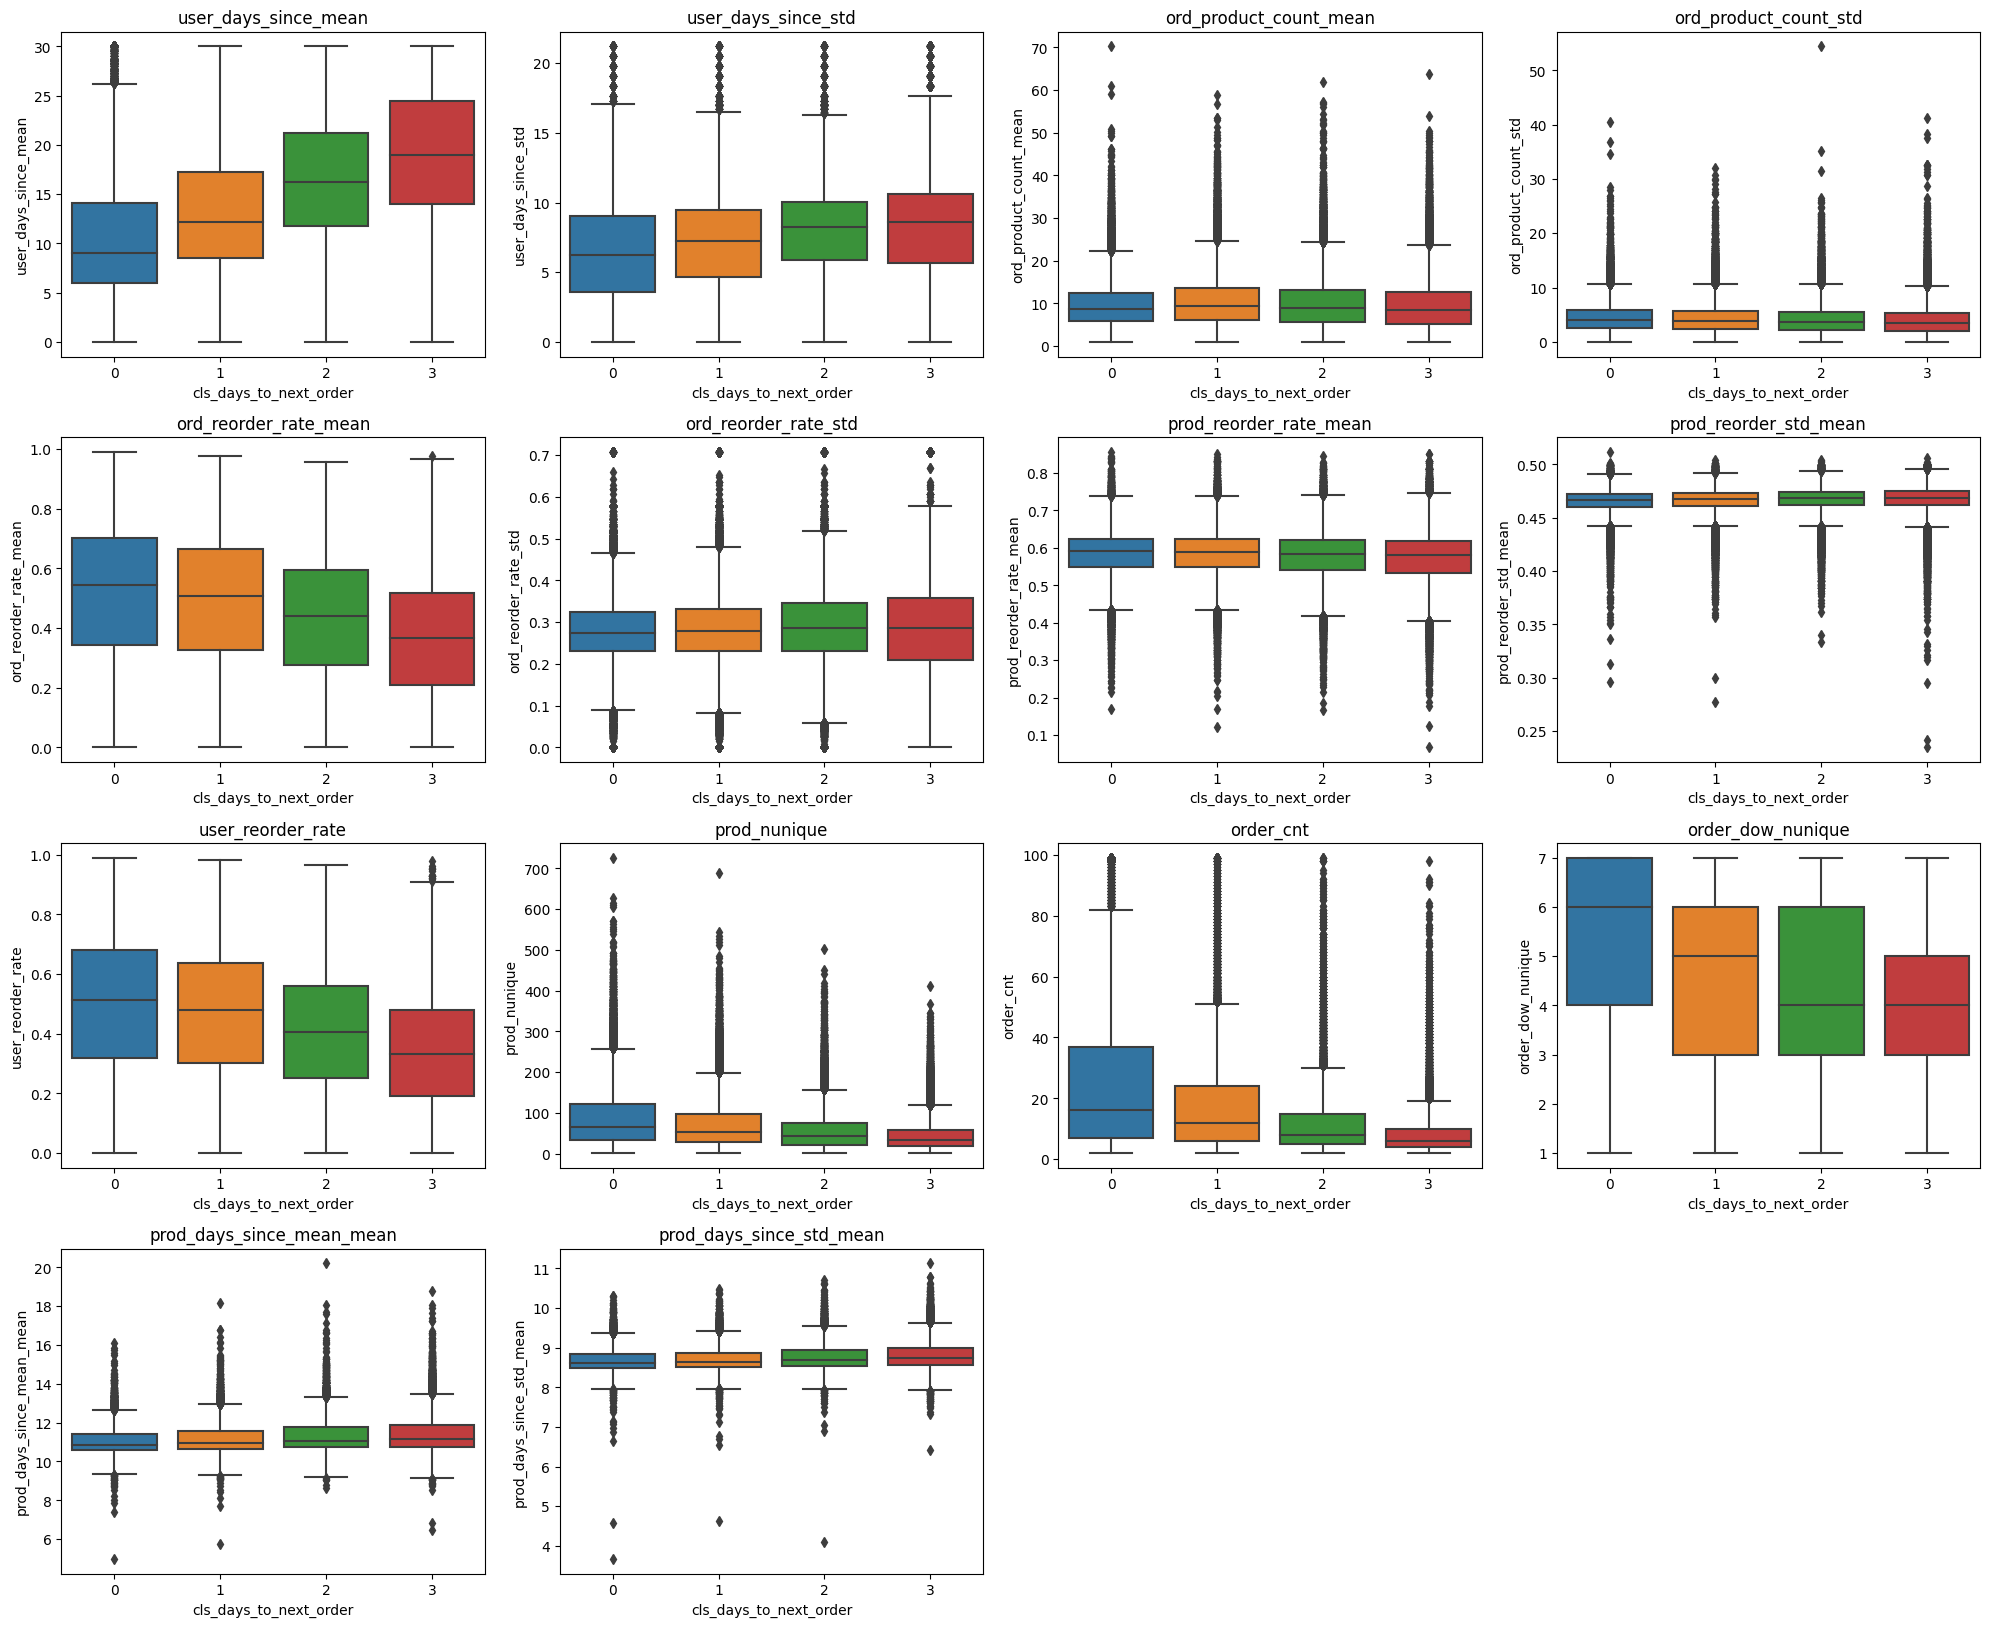

In [95]:
# Plot distribution of features, grouped by cls_days_to_next_order
plt.figure(figsize=(20, 20))
for i, col in enumerate(manual_features):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x="cls_days_to_next_order", y=col, data=visualization_df)
    plt.title(col)
plt.tight_layout()
plt.show()

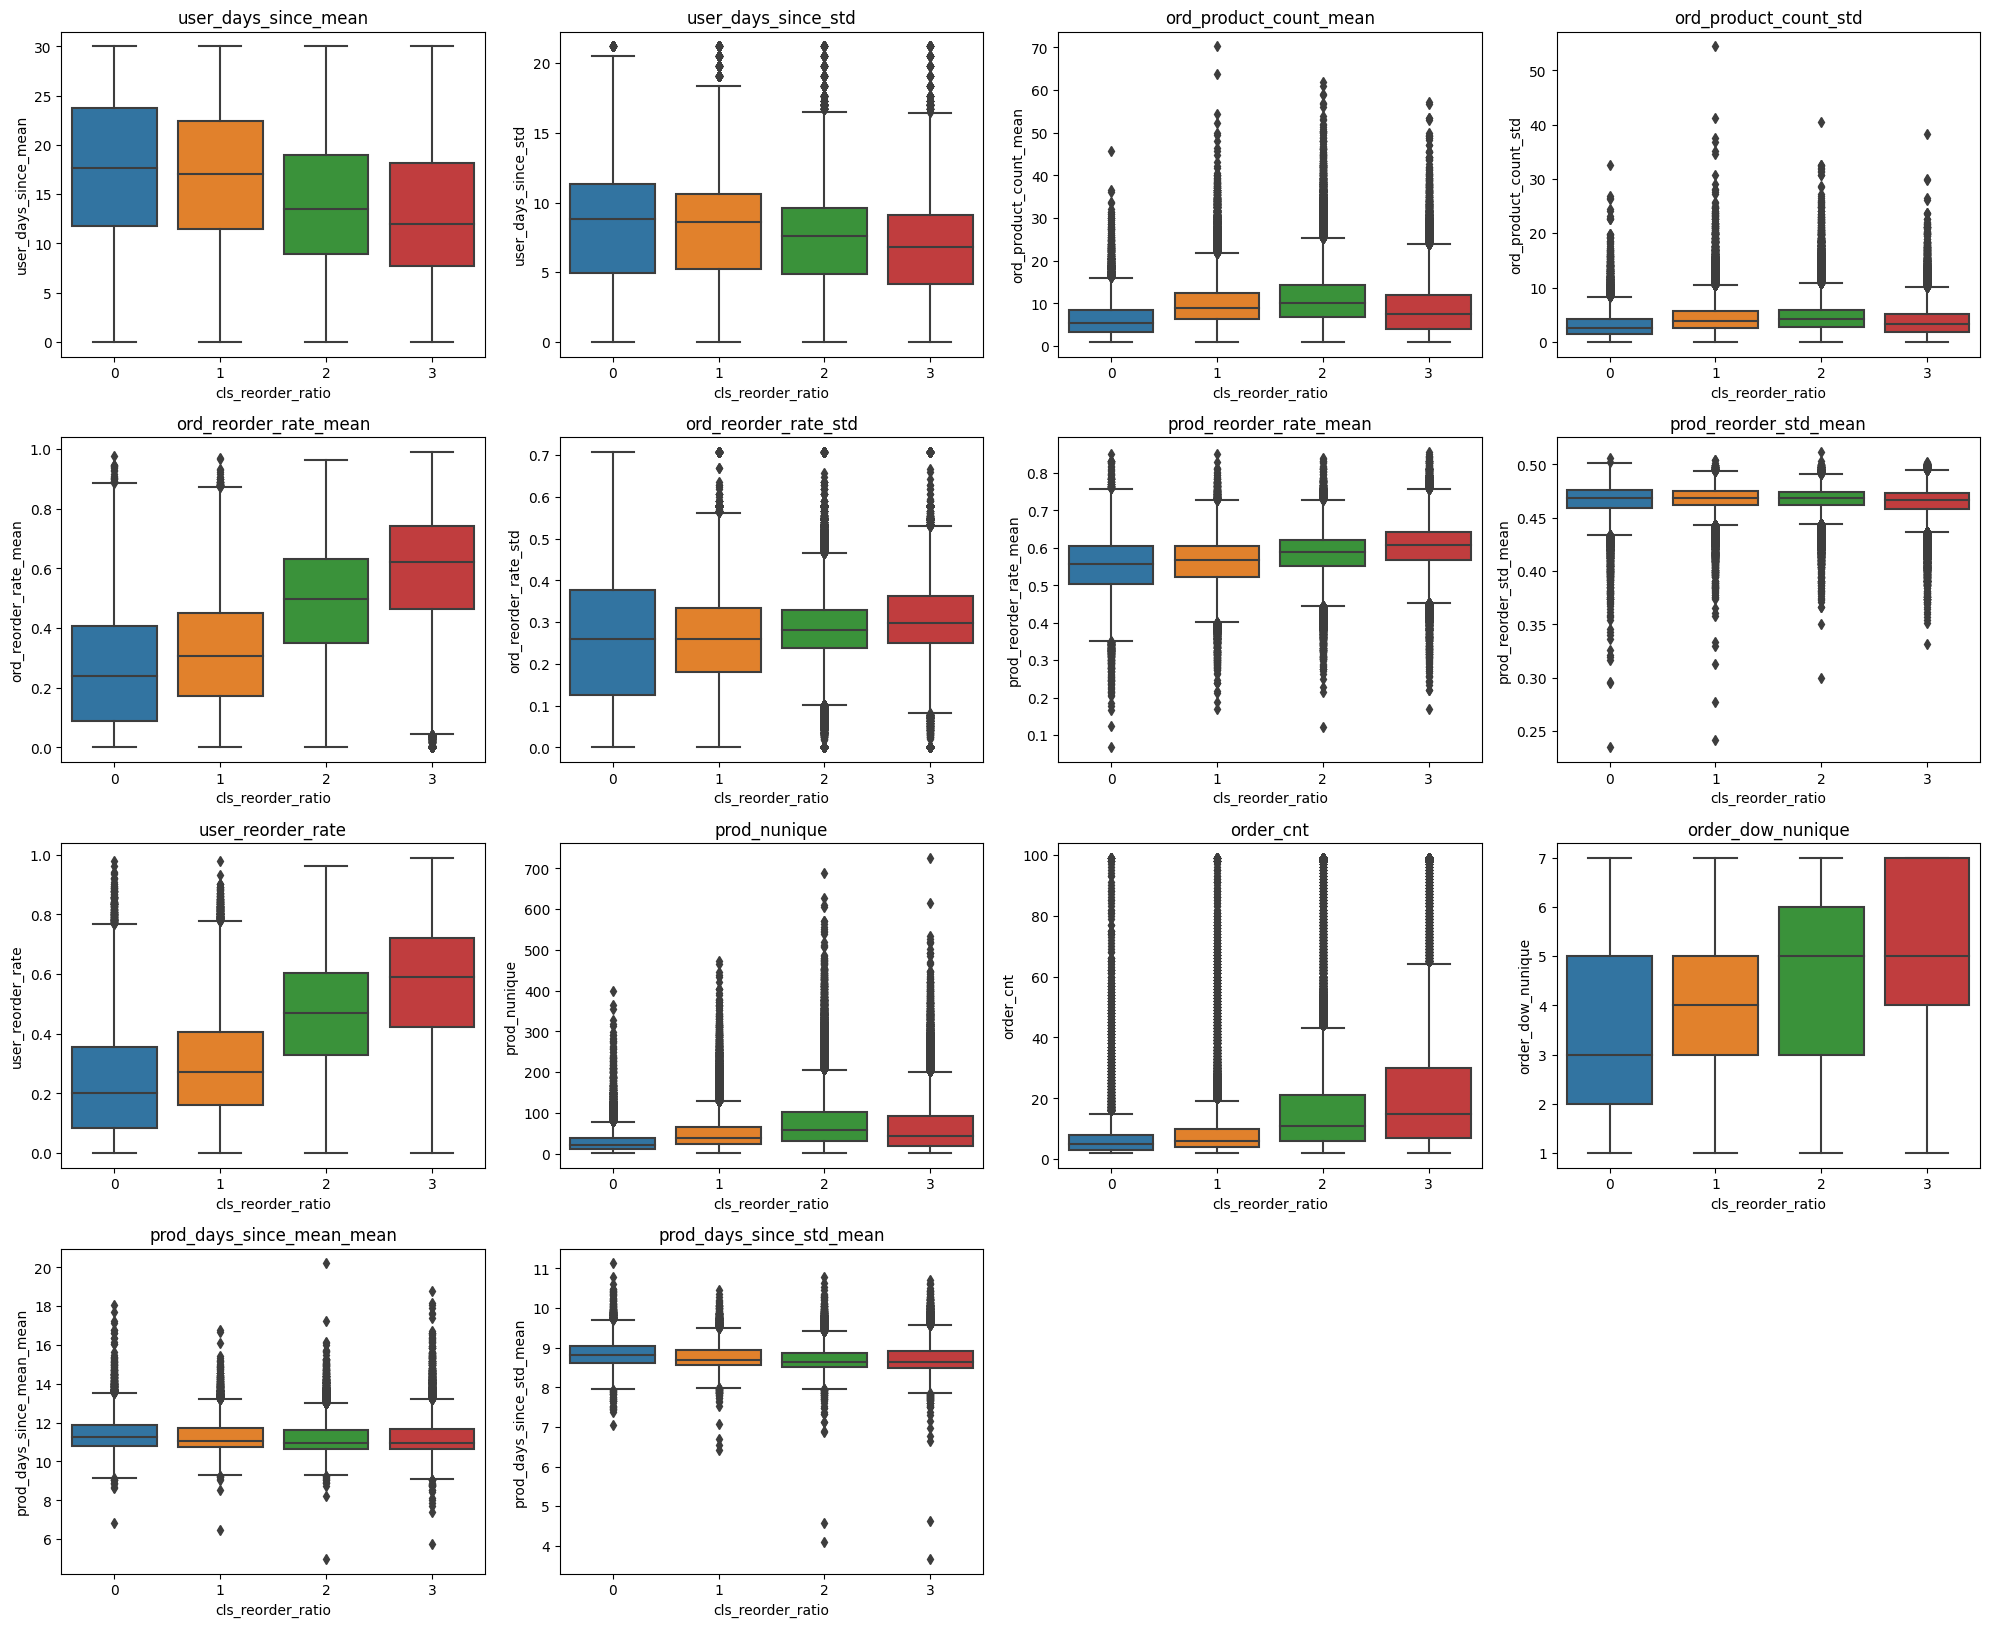

In [96]:
# Plot distribution of features, grouped by cls_reorder_ratio
plt.figure(figsize=(20, 20))
for i, col in enumerate(manual_features):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x="cls_reorder_ratio", y=col, data=visualization_df)
    plt.title(col)
plt.tight_layout()
plt.show()


**Observation**

`user_*` features and `ord_*` features seems to offer strong signals. Meanwhile `prod_*` features doesn't seems to differentiates much between different label classes for both tasks, except for `prod_nunique` number of unique products bought in the past.